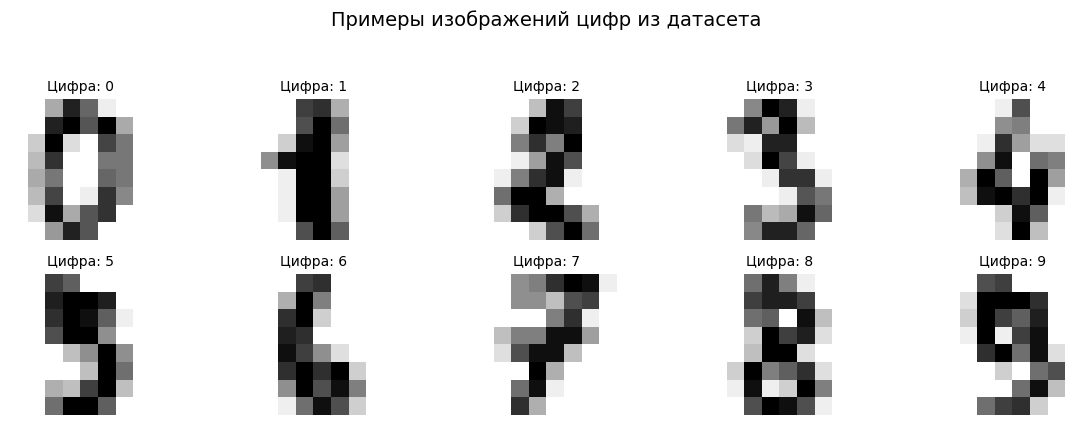


Обучение модели...
Iteration 1, loss = 2.08595369
Validation score: 0.513889
Iteration 2, loss = 1.56193679
Validation score: 0.736111
Iteration 3, loss = 1.15158019
Validation score: 0.782407
Iteration 4, loss = 0.83410243
Validation score: 0.810185
Iteration 5, loss = 0.60468171
Validation score: 0.856481
Iteration 6, loss = 0.44718870
Validation score: 0.893519
Iteration 7, loss = 0.34086655
Validation score: 0.916667
Iteration 8, loss = 0.26850943
Validation score: 0.916667
Iteration 9, loss = 0.21791243
Validation score: 0.930556
Iteration 10, loss = 0.17976571
Validation score: 0.935185
Iteration 11, loss = 0.15077075
Validation score: 0.944444
Iteration 12, loss = 0.12856068
Validation score: 0.953704
Iteration 13, loss = 0.11075859
Validation score: 0.962963
Iteration 14, loss = 0.09654827
Validation score: 0.962963
Iteration 15, loss = 0.08505492
Validation score: 0.962963
Iteration 16, loss = 0.07529551
Validation score: 0.962963
Iteration 17, loss = 0.06663483
Validation sc

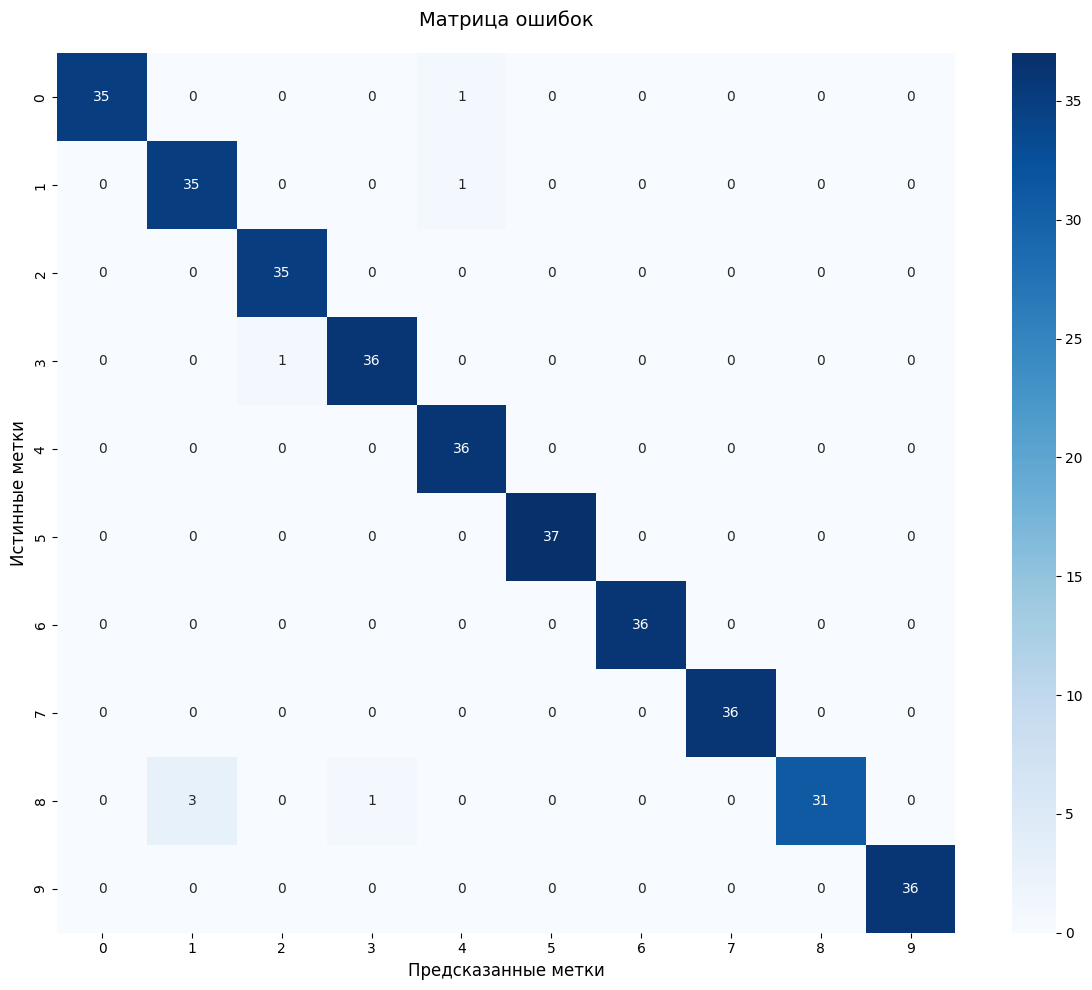


МЕТРИКИ ПО КЛАССАМ:
+---------+-------------+----------+------------+-------------+
|   Цифра |   Precision |   Recall |   F1-Score |   Поддержка |
+=========+=============+==========+============+=============+
|       0 |      1.0000 |   0.9722 |     0.9859 |     36.0000 |
+---------+-------------+----------+------------+-------------+
|       1 |      0.9211 |   0.9722 |     0.9459 |     36.0000 |
+---------+-------------+----------+------------+-------------+
|       2 |      0.9722 |   1.0000 |     0.9859 |     35.0000 |
+---------+-------------+----------+------------+-------------+
|       3 |      0.9730 |   0.9730 |     0.9730 |     37.0000 |
+---------+-------------+----------+------------+-------------+
|       4 |      0.9474 |   1.0000 |     0.9730 |     36.0000 |
+---------+-------------+----------+------------+-------------+
|       5 |      1.0000 |   1.0000 |     1.0000 |     37.0000 |
+---------+-------------+----------+------------+-------------+
|       6 |      1.

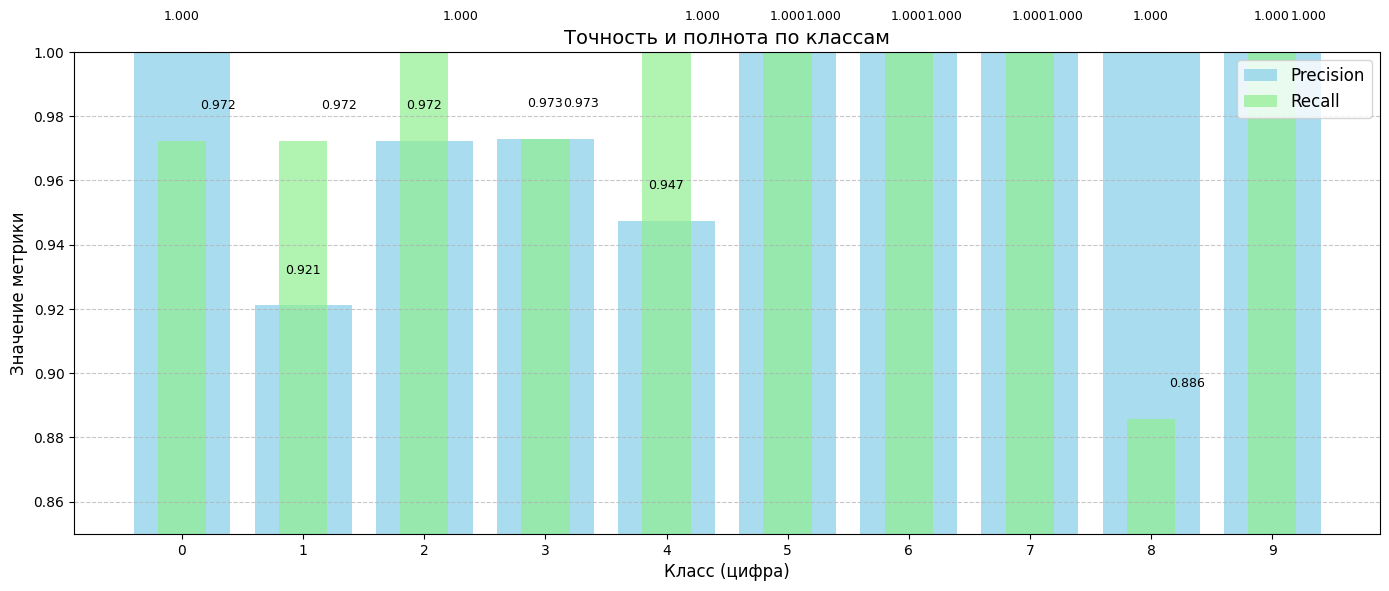

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            accuracy_score,
                            precision_score,
                            recall_score)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


digits = load_digits()

# Визуализация примеров цифр
plt.figure(figsize=(12, 4))
plt.suptitle("Примеры изображений цифр из датасета", fontsize=14, y=1.05)
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray_r)  # Исправлено: добавлен np
    plt.title(f'Цифра: {label}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=digits.target)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели MLPClassifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(150, 100),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=256,
    learning_rate='adaptive',
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.15,
    random_state=42,
    verbose=True
)

print("\nОбучение модели...")
mlp_clf.fit(X_train_scaled, y_train)
print(f"Обучение завершено. Количество итераций: {mlp_clf.n_iter_}")
y_pred = mlp_clf.predict(X_test_scaled)
y_proba = mlp_clf.predict_proba(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

metrics = [
    ["Accuracy", accuracy],
    ["Precision (weighted)", precision],
    ["Recall (weighted)", recall]
]

print("\nОСНОВНЫЕ МЕТРИКИ МОДЕЛИ:")
print("="*50)
print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid", floatfmt=".4f"))
print("="*50)
print("\nПОДРОБНЫЙ ОТЧЕТ ПО КЛАССАМ:")
print("="*50)
print(classification_report(y_test, y_pred, digits=4))
print("="*50)
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.title('Матрица ошибок', fontsize=14, pad=20)
plt.xlabel('Предсказанные метки', fontsize=12)
plt.ylabel('Истинные метки', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
class_report = classification_report(y_test, y_pred, output_dict=True)
class_metrics = []
for digit in range(10):
    class_metrics.append([
        digit,
        class_report[str(digit)]['precision'],
        class_report[str(digit)]['recall'],
        class_report[str(digit)]['f1-score'],
        class_report[str(digit)]['support']
    ])
print("\nМЕТРИКИ ПО КЛАССАМ:")
print("="*90)
print(tabulate(class_metrics,
               headers=["Цифра", "Precision", "Recall", "F1-Score", "Поддержка"],
               tablefmt="grid",
               floatfmt=".4f"))
print("="*90)
plt.figure(figsize=(14, 6))
plt.bar(range(10), [class_report[str(d)]['precision'] for d in range(10)],
        color='skyblue', alpha=0.7, label='Precision')
plt.bar(range(10), [class_report[str(d)]['recall'] for d in range(10)],
        color='lightgreen', alpha=0.7, label='Recall', width=0.4)
plt.title('Точность и полнота по классам', fontsize=14)
plt.xlabel('Класс (цифра)', fontsize=12)
plt.ylabel('Значение метрики', fontsize=12)
plt.xticks(range(10))
plt.ylim(0.85, 1.0)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(10):
    plt.text(i-0.15, class_report[str(i)]['precision']+0.01,
             f"{class_report[str(i)]['precision']:.3f}", fontsize=9)
    plt.text(i+0.15, class_report[str(i)]['recall']+0.01,
             f"{class_report[str(i)]['recall']:.3f}", fontsize=9)

plt.tight_layout()
plt.show()
